In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding = "utf-8")
test_df = pd.read_csv("test.csv", encoding = "utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
train_df.isna().sum() #查缺值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
med = train_df.median() #中位數
train_df = train_df.fillna(med) #缺值補中位數
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test_df.isna().sum() #查缺值 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
test_df = test_df.fillna(med) #缺值補中位數, 用train的中位數
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_df["Embarked"].value_counts() #加上.idxmax()直接顯示最多的

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
# 文字補缺失值
the_most = train_df["Embarked"].value_counts().idxmax()
train_df["Embarked"] = train_df["Embarked"].fillna(the_most)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# 文字補缺失值
test_df["Embarked"] = test_df["Embarked"].fillna(the_most)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [9]:
dummy = pd.get_dummies(train_df["Embarked"]) #one-hot encoding(Embarked)
train_df = pd.concat([train_df, dummy], axis=1) #將embarked資料導入train df,axis=1代表新增column
train_df
#只要是文字都要one-hot encoding, 除非有大小關係或只有兩個類別

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0


In [10]:
dummy = pd.get_dummies(test_df["Embarked"]) #one-hot encoding(Embarked)
test_df = pd.concat([test_df, dummy], axis=1) #將embarked資料導入test df,axis=1代表新增column
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0,1


In [11]:
dummy = pd.get_dummies(train_df["Sex"])
train_df = pd.concat([train_df, dummy], axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0,1,0


In [12]:
dummy = pd.get_dummies(test_df["Sex"])
test_df = pd.concat([test_df, dummy], axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0,1,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,1,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0,1,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0,1,0,1


In [13]:
s = "Braund, Mr. Owen Harris"
s.split(",")[-1].split(".")[0].replace(" ", "") #切出稱謂

'Mr'

In [14]:
def namecut(s):
    return s.split(",")[-1].split(".")[0].replace(" ", "")
mid = train_df["Name"].apply(namecut) #稱謂
pd.crosstab(train_df["Survived"], mid) #查看稱謂跟生存的關係

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [15]:
def namecut(s):
    reserved = ["Master", "Miss", "Mr", "Mrs"] #選出數量多的參數
    m = s.split(",")[-1].split(".")[0].replace(" ", "")
    if m in reserved:
        return m
    else:
        return "X"
trans = train_df["Name"].apply(namecut)
dummy = pd.get_dummies(trans)
train_df = pd.concat([train_df, dummy], axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,female,male,Master,Miss,Mr,Mrs,X
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,0,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,...,0,1,0,0,1,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,1,0,1,0,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,1,0,1,1,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,1,1,0,0,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,1,0,0,1,0,0,0,0,1,0


In [16]:
trans = test_df["Name"].apply(namecut)
dummy = pd.get_dummies(trans)
test_df = pd.concat([test_df, dummy], axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,C,Q,S,female,male,Master,Miss,Mr,Mrs,X
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,0,0,1,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,1,1,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,1,0,0,1,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,1,0,1,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,1,1,0,0,0,0,1,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,...,0,0,1,0,1,0,0,1,0,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,...,0,1,0,1,0,0,1,0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,...,0,0,1,0,1,0,0,1,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,...,1,0,0,1,0,0,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,...,0,0,1,0,1,0,0,1,0,0


In [17]:
train_df.columns #查看現有欄位

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'female',
       'male', 'Master', 'Miss', 'Mr', 'Mrs', 'X'],
      dtype='object')

In [18]:
train = train_df.drop(['PassengerId', 'Name', 
                       'Sex', 'Ticket', 
                       'Cabin', 'Embarked', 
                       'X'], axis=1) #去除不要的欄位
x_train = train.drop(["Survived"], axis=1)
y_train = train["Survived"]
x_train

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
5,3,28.0,0,0,8.4583,0,1,0,0,1,0,0,1,0
6,1,54.0,0,0,51.8625,0,0,1,0,1,0,0,1,0
7,3,2.0,3,1,21.0750,0,0,1,0,1,1,0,0,0
8,3,27.0,0,2,11.1333,0,0,1,1,0,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,0,1


In [19]:
test = test_df.drop(['Name', 'Sex', 'Ticket', 
                       'Cabin', 'Embarked', 'X'], 
                     axis=1) #test因為要對照id所以不去除"PassengerId"
x_test = test.drop(["PassengerId"], axis=1)
pid = test["PassengerId"]
x_test

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
5,3,14.0,0,0,9.2250,0,0,1,0,1,0,0,1,0
6,3,30.0,0,0,7.6292,0,1,0,1,0,0,1,0,0
7,2,26.0,1,1,29.0000,0,0,1,0,1,0,0,1,0
8,3,18.0,0,0,7.2292,1,0,0,1,0,0,0,0,1
9,3,21.0,2,0,24.1500,0,0,1,0,1,0,0,1,0


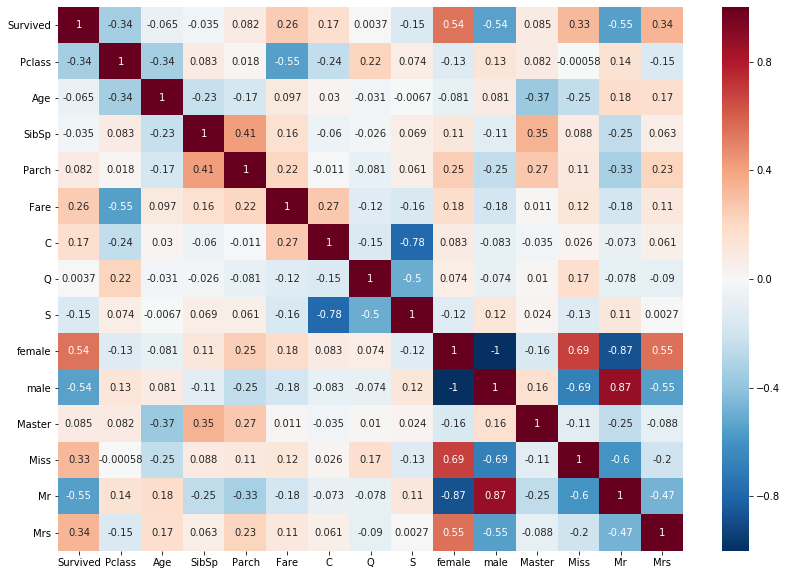

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(14, 10)) #圖片大小
sns.heatmap(train.corr(), annot=True, cmap="RdBu_r") 
# annot加上數字, cmap更改顏色
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# 相關係數表只能用在迴歸和只有兩個類別的時候
# 決策樹沒有這個要求

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
p = {
    "n_estimators":range(15, 25),
    "max_depth":range(5, 10)
}
cv = GridSearchCV(clf, param_grid=p, cv=10)
cv.fit(x_train, y_train)
cv.best_params_

{'max_depth': 8, 'n_estimators': 19}

In [22]:
#組合 1.序列       right---------       right--------- 
#           model1               model2               model3
#                 wrong 加強訓練-       wrong 加強訓練-
#    
#    2.平行        model1 ˋ
#每個模型要略有不同 model2 - 投票    隨機森林(隨機放棄一點資料)   
#                 model3 ˊ

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(n_estimators=25, max_depth=8) #需要微調
np.average(cross_val_score(clf, x_train, y_train, cv=10)) 
# (clf, x_train, y_train, 切幾份)

0.8350272386789241

In [28]:
clf = RandomForestClassifier(n_estimators=19, max_depth=8)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
pre = clf.predict(x_test)
result = pd.DataFrame()
result["PassengerId"] = pid
result["Survived"] = pre
result.to_csv("titanic.csv", encoding="utf-8", index=False)

In [32]:
imp = pd.DataFrame()
imp["name"] = x_train.columns
imp["value"] = clf.feature_importances_
imp
# 查看各columns重要性

,name,value
0,Pclass,0.105852
1,Age,0.118755
2,SibSp,0.048513
3,Parch,0.039569
4,Fare,0.164509
5,C,0.010143
6,Q,0.009421
7,S,0.015996
8,female,0.098446
9,male,0.120641


In [30]:
# kNN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)
np.average(cross_val_score(clf, x_train_norm, y_train, cv=10))

0.8137282941777324

In [27]:
clf.fit(x_train_norm, y_train)
pre = clf.predict(x_test_norm)
result = pd.DataFrame()
result["PassengerId"] = pid
result["Survived"] = pre
result.to_csv("titanic_knn.csv", encoding="utf-8", index=False)